# Prepare prediction model for 50 startup data

- Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
- R&D Spend -- Research and devolop spend in the past few years.
- Administration -- spend on administration in the past few years.
- Marketing -- spend on Marketing in the past few years.
- State -- states from which data is collected.
- Profit  -- profit of each state in the past few years.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv(r'C:\Users\ADMIN\Desktop\Data Science\Assignment_5\50_Startups.csv')
df.drop(columns='State',inplace=True)
df=df.rename(columns={'R&D Spend':'R_D','Marketing Spend':'Marketing'})
df.head()

,R_D,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [9]:
df.isna().sum()

R_D               0
Administration    0
Marketing         0
Profit            0
dtype: int64

In [10]:
df.describe()

,R_D,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Data Visualisation

In [15]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=100
sns.set_style('darkgrid')

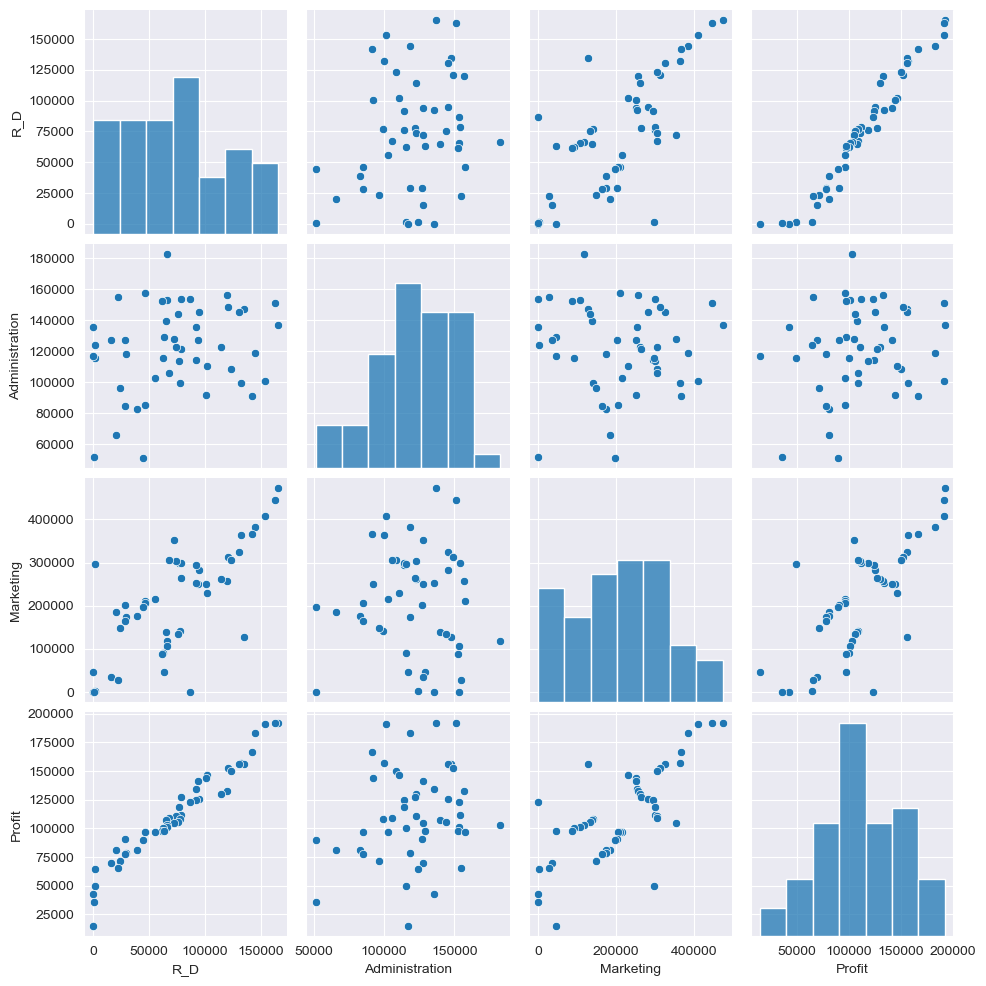

In [16]:
sns.pairplot(df)

In [17]:
df.corr()

,R_D,Administration,Marketing,Profit
R_D,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

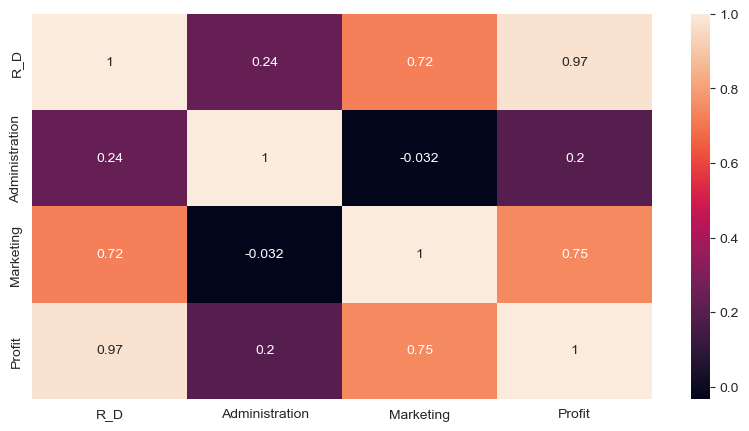

In [18]:
sns.heatmap(df.corr(),annot=True)

# Model Building

In [19]:
model = smf.ols('Profit~R_D+Administration+Marketing',data=df).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 16 May 2023   Prob (F-statistic):           4.53e-30
Time:                        19:09:50   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Model

In [21]:
# Profit~Administration model
model2=smf.ols('Profit~Administration',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 16 May 2023   Prob (F-statistic):              0.162
Time:                        19:13:58   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Profit~Marketing model
model3=smf.ols('Profit~Marketing',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 16 May 2023   Prob (F-statistic):           4.38e-10
Time:                        19:15:06   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF


In [23]:
df.columns

Index(['R_D', 'Administration', 'Marketing', 'Profit'], dtype='object')

In [24]:
r_R_D = smf.ols('R_D~Administration+Marketing', data= df).fit().rsquared
v_R_D = 1/(1- r_R_D)

r_Administration = smf.ols('Administration~R_D+Marketing', data= df).fit().rsquared
v_Administration = 1/(1- r_Administration)

r_Marketing = smf.ols('Marketing~R_D+Administration', data= df).fit().rsquared
v_Marketing = 1/(1- r_Marketing)

In [26]:
data=pd.DataFrame({
    'Features': ['R_D','Administration','Marketing'],
    'VIF': [v_R_D,v_Administration,v_Marketing]
})
data

,Features,VIF
0,R_D,2.468903
1,Administration,1.175091
2,Marketing,2.326773


# Subset Selection

In [27]:
market= smf.ols('Profit~R_D+Marketing',data=df).fit()
print(market.rsquared,market.aic)

0.9504503015559763 1057.070772191826


In [28]:
admin=smf.ols('Profit~R_D+Administration',data=df).fit()
print(admin.rsquared,admin.aic)

0.9478129385009173 1059.6636934567293


In [29]:
market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 16 May 2023   Prob (F-statistic):           2.16e-31
Time:                        19:24:08   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_D            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation Technique

# 1 Residual analysis

- As per the subset selection, it is clear that Marketing column is more important than Administration column as it's R2 value is more and AIC value is less,So we will select Marketing columns and will drop Administration column.


# Normality Test

In [32]:
market.resid

0      -538.628625
1      2017.400520
2      9645.011903
3      9460.681158
4     -4939.683218
5     -5888.190812
6     -1905.620454
7     -4703.138877
8      -106.033673
9     -4583.853935
10    11110.035276
11     9620.529925
12    12367.123421
13     6495.144535
14   -17589.841797
15   -16115.675433
16     9967.038152
17    -5459.074732
18    -4615.298828
19     6960.441667
20     1823.137908
21    -7071.150709
22    -4638.134639
23    -1152.195217
24    -4000.147151
25     4791.430758
26    -5257.252884
27    -9970.295150
28      157.367240
29    -1435.784090
30      852.370438
31     -830.988854
32    -1436.822254
33     -821.810445
34     6450.158781
35     6703.015715
36    14883.956088
37     1975.125482
38    12597.741677
39    -1919.055275
40     3190.853969
41     3684.941295
42     1264.239426
43     9368.747148
44     -289.399308
45    17096.506020
46    -7419.050859
47    -4416.134221
48   -11734.242602
49   -33645.494462
dtype: float64

In [35]:
import statsmodels.api as sm

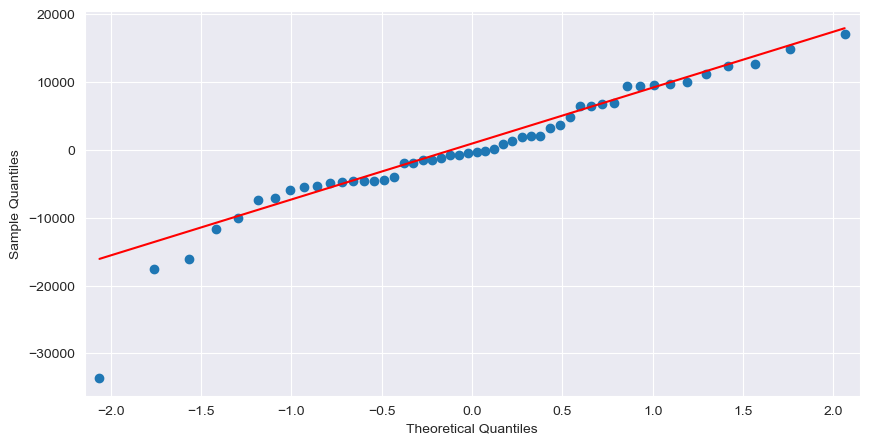

In [38]:
# Q-Q Plot
sm.qqplot(market.resid,line='q');

# 2 Residual plot of Homoscrdasticity
- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

Text(0, 0.5, 'Residuals')

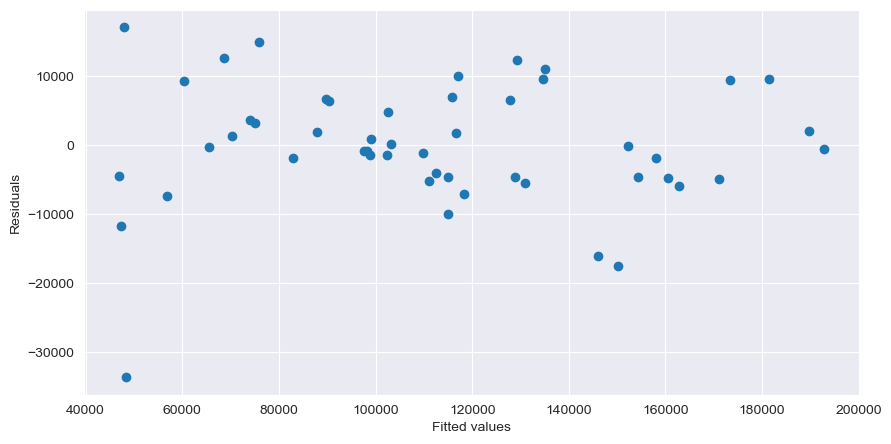

In [39]:
plt.scatter(market.fittedvalues, market.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# 3 Residual vs Regressor

eval_env: 1


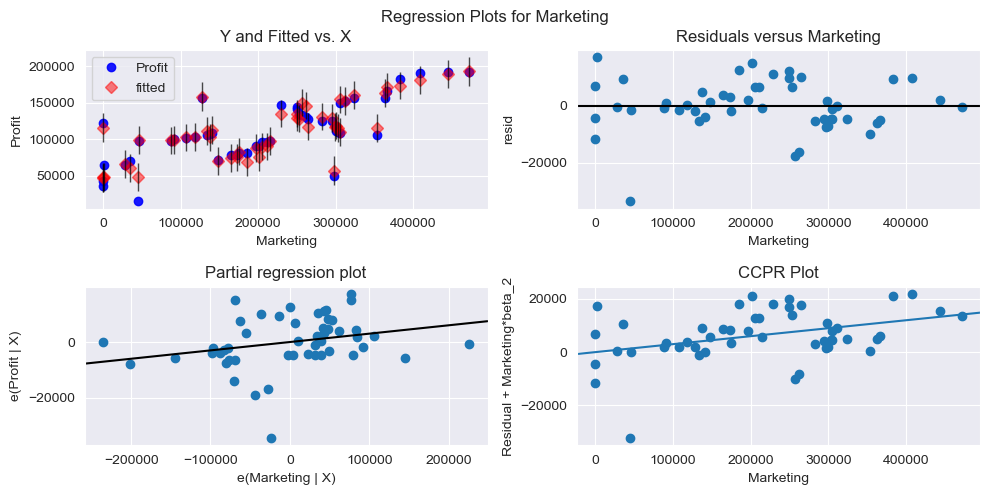

In [40]:
sm.graphics.plot_regress_exog(market,'Marketing');

eval_env: 1


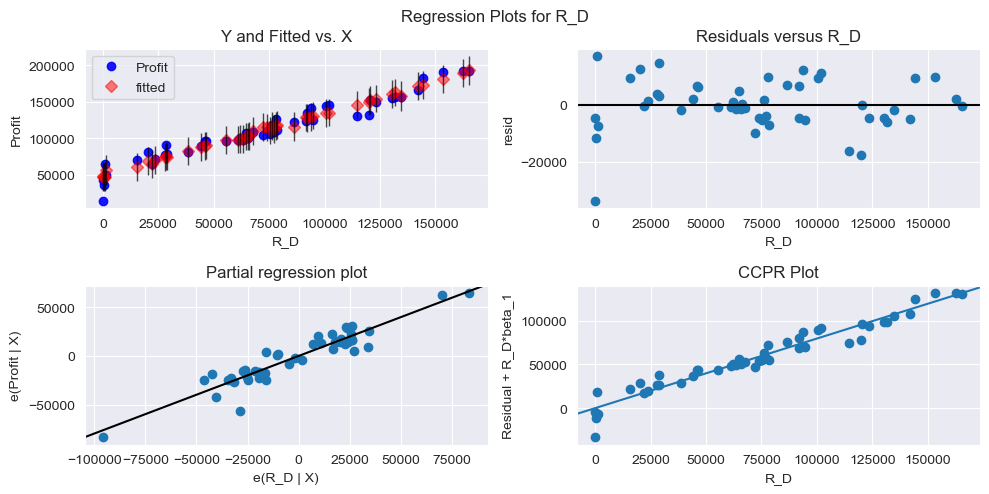

In [41]:
sm.graphics.plot_regress_exog(market, 'R_D');

# Model Deletion Technique

## Cook's Distance
Detecting influencers and outliers

In [42]:
market = smf.ols('Profit~R_D+Marketing',data=df).fit()

In [43]:
inf = market.get_influence()
c, p = inf.cooks_distance
c

array([1.81512394e-04, 2.17714151e-03, 3.85030256e-02, 2.97393985e-02,
       7.43914487e-03, 8.87288175e-03, 3.60799476e-03, 4.97976353e-03,
       2.01902031e-06, 4.00294501e-03, 1.64482064e-02, 1.07062146e-02,
       1.52583172e-02, 4.10195007e-03, 6.23696501e-02, 4.28041217e-02,
       1.08143179e-02, 3.37984862e-03, 2.70426509e-03, 5.18325214e-02,
       5.68610172e-04, 8.25784837e-03, 4.13103131e-03, 3.07888695e-04,
       2.54030757e-03, 2.87274239e-03, 4.56256249e-03, 3.76461096e-02,
       4.04646886e-06, 3.84226278e-04, 1.54537882e-04, 1.49920702e-04,
       7.91098475e-04, 7.81029691e-05, 6.23157729e-03, 6.50961158e-03,
       5.60674443e-02, 5.62367665e-04, 4.68122817e-02, 5.47791686e-04,
       2.06083678e-03, 2.68539324e-03, 3.32631540e-04, 2.55928157e-02,
       2.50014790e-05, 1.17553495e-01, 7.74416953e-02, 7.99827600e-03,
       5.61942095e-02, 3.89488623e-01])

<StemContainer object of 3 artists>

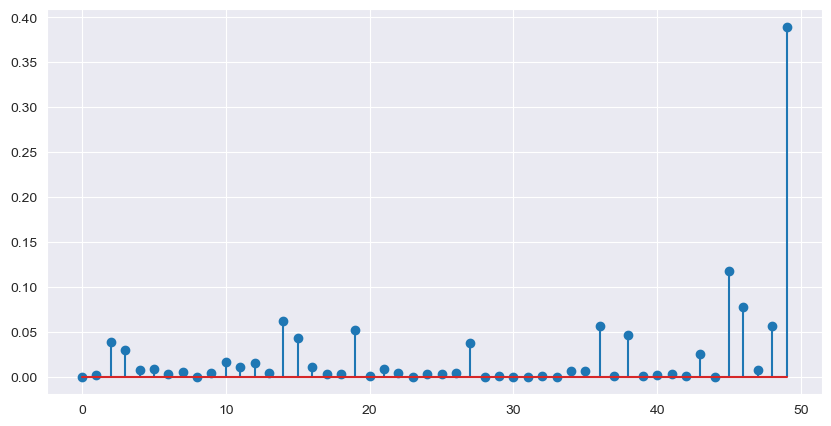

In [44]:
# Cook's distance plot
plt.stem(range(len(df)), c)

In [45]:
np.argmax(c), np.max(c)


(49, 0.3894886227924922)

In [46]:
df.iloc[[49]]

,R_D,Administration,Marketing,Profit
49,0.0,116983.8,45173.06,14681.4


In [47]:
# Calculating cutoff

k = len(df.columns)
n = len(df)

cutoff = 3*(k+1)/n
cutoff

0.3

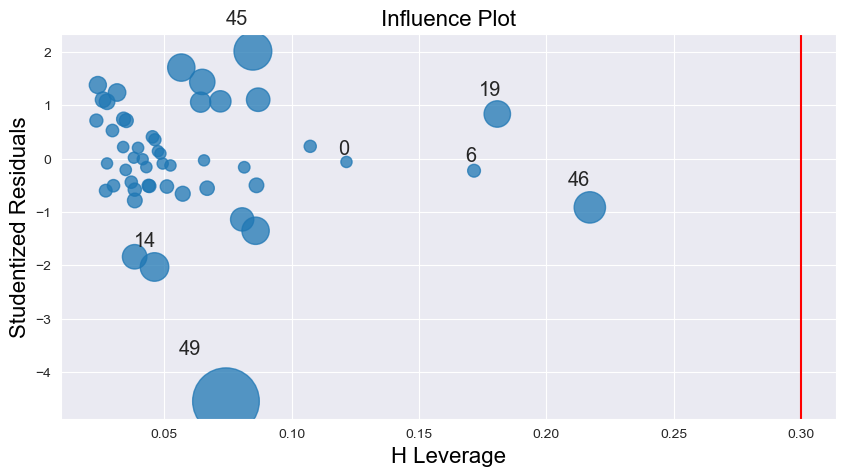

In [48]:
# Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(market)
plt.axvline(cutoff, color='r')

In [49]:
np.argmax(c), np.max(c)

(49, 0.3894886227924922)

####  Since the value is <1 , we can stop the diagnostic process and finalize the model

In [50]:
final_model = smf.ols('Profit~R_D+Marketing',data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 16 May 2023   Prob (F-statistic):           2.16e-31
Time:                        19:57:44   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_D            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Prediction for new data

In [51]:
newdata = pd.DataFrame({
    'R_D' : [60000,120000,180000],
    'Marketing' : [10000,235000,470000]
})
newdata

,R_D,Marketing
0,60000,10000
1,120000,235000
2,180000,470000


In [52]:
newdata['Profit'] = final_model.predict(newdata)
newdata

,R_D,Marketing,Profit
0,60000,10000,95069.985616
1,120000,235000,149594.300181
2,180000,470000,204417.693498


In [53]:
R_table = pd.DataFrame({
    'Model Name' : ['model', 'model-2', 'model-3', 'market', 'admin', 'final model(market)'],
    
    'Model R^2 value' : [model.rsquared, model2.rsquared, model3.rsquared, market.rsquared,
                         admin.rsquared, final_model.rsquared]
})
R_table

,Model Name,Model R^2 value
0,model,0.950746
1,model-2,0.040287
2,model-3,0.559154
3,market,0.950450
4,admin,0.947813
5,final model(market),0.950450
